# Neural Networks Assignment (Graded)

Welcome to your first (required) programming assignment! You will build a Neural Network to recognize various everyday objects. This assignment will step you through how to do this with a Neural Network mindset, and will also hone your intuitions about deep learning.

**Instructions:**
* Do not modify any of the codes.
* Only write code when prompted. For example in some sections you will find the following,
```
# YOUR CODE GOES HERE
# YOUR CODE ENDS HERE
# TODO
```
Only modify those sections of the code.

**You will learn to:**
* Explore the CIFAR10 dataset: https://www.cs.toronto.edu/~kriz/cifar.html
* Build the general architecture of a neural network, including:
  * Initializing parameters
  * Calculating the cost function and its gradient
  * Using an optimization algorithm (gradient descent)
* Gather all three functions above into a main model function, in the right order.

In [1]:
import tensorflow as tf
import numpy as np

from helpers import *
from tests import *

In [2]:
# Import dataset
from tensorflow.keras.datasets import cifar10

# Load dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 45s 0us/step


## Visualizing the dataset

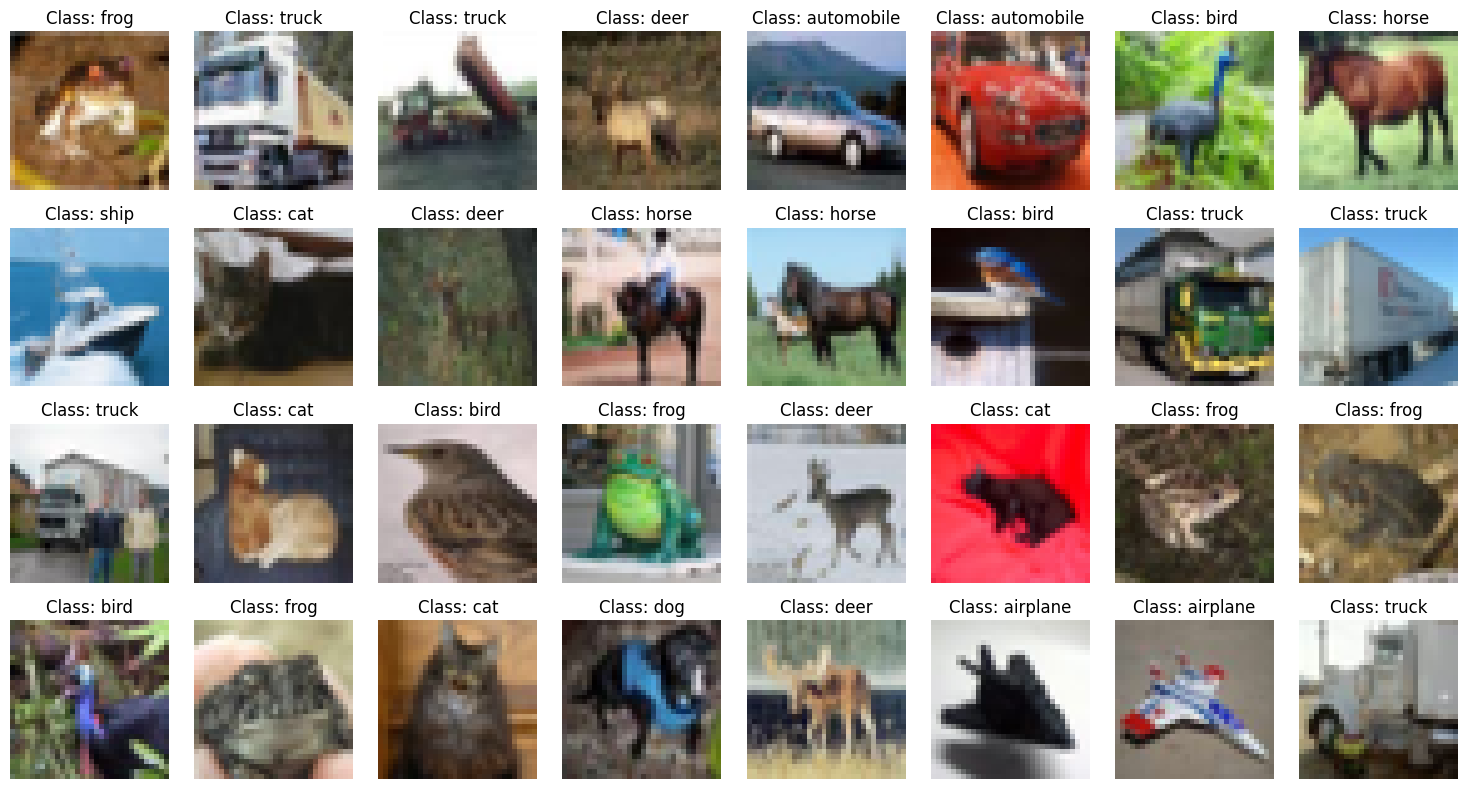

In [3]:
import matplotlib.pyplot as plt

# Visualize a grid of images from the training set
display_image_grid(X_train[:32], y_train[:32])


#### How many images does the training dataset contain?


In [ ]:
# YOUR CODE GOES HERE

X_train.shape #the output has the number of images in the training dataset, number of pixels, and number of channels (RGB)


(50000, 32, 32, 3)


**Expected Output:**
```
50000
```



#### How many images does the testing dataset contain?


In [10]:
# YOUR CODE GOES HERE
X_test.shape

(10000, 32, 32, 3)


**Expected Output:**
```
10000
```



#### How many output classes does the dataset contain? Can you list them?

In [15]:
# YOUR CODE GOES HERE
classes = np.unique(y_train)
print(classes)

[0 1 2 3 4 5 6 7 8 9]


**Expected Output:**
```
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)
```

#### Find out the total number of images in each class.

In [16]:
# TODO

num_classes = len(np.unique(y_train))
for cls in range(num_classes):
  count = 0
  # YOUR CODE GOES HERE
  count = np.sum(y_train == cls)
  # YOUR CODE ENDS HERE
  print("Number of images belonging to {} is {}".format(cls, count))

Number of images belonging to 0 is 5000
Number of images belonging to 1 is 5000
Number of images belonging to 2 is 5000
Number of images belonging to 3 is 5000
Number of images belonging to 4 is 5000
Number of images belonging to 5 is 5000
Number of images belonging to 6 is 5000
Number of images belonging to 7 is 5000
Number of images belonging to 8 is 5000
Number of images belonging to 9 is 5000


**Expected Output:**
```
Number of images belonging to 0 is 5000
Number of images belonging to 1 is 5000
Number of images belonging to 2 is 5000
Number of images belonging to 3 is 5000
Number of images belonging to 4 is 5000
Number of images belonging to 5 is 5000
Number of images belonging to 6 is 5000
Number of images belonging to 7 is 5000
Number of images belonging to 8 is 5000
Number of images belonging to 9 is 5000
```



---



# Preprocessing the dataset
We shall be performing the following steps to preprocess our dataset in order to get the highest possible model performance:

1. **Normalization:** Scaling down the pixel values between 0 to 1.
2. **Flattening:** Flattenning the dataset such that the shape of the image (num_px, num_px, 3) are flattened into single vectors of shape (num_px
 num_px
 3, 1).
3. **One Hot Encoding:** Encoding the values into a one hot vector.

In [29]:
# TODO

def data_preprocessing(X_train, X_test, y_train, y_test):

    """Preprocesses the training and testing data for a machine learning model.

    Args:
        X_train: Training dataset features.
        X_test: Testing dataset features.
        y_train: Training dataset labels.
        y_test: Testing dataset labels.

    Returns:
        X_train: Preprocessed training dataset features.
        X_test: Preprocessed testing dataset features.
        y_train: Preprocessed training dataset labels.
        y_test: Preprocessed testing dataset labels.

    """

    # Data Normalization
    # YOUR CODE GOES HERE
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Flattening
    # YOUR CODE GOES HERE
    X_train = X_train.reshape(-1, 32*32*3)
    X_test = X_test.reshape(-1, 32*32*3)

    # One Hot Encoding
    # YOUR CODE GOES HERE
    y_train_oh = tf.keras.utils.to_categorical(y_train, 10)
    y_test_oh = tf.keras.utils.to_categorical(y_test, 10)

    # YOUR CODE ENDS HERE
    preprocessing_tests(X_train, X_test, y_train_oh, y_test_oh)

    return X_train, X_test, y_train_oh, y_test_oh



# Model Building

Here, you shall be building a feedforward neural network with atleast 3 hidden neurons.

In [38]:
# TODO

# Import necessary modules
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential


def build_model(input_shape, num_classes):
    """Builds a feedforward neural network model.

    Args:
        input_shape: Tuple specifying the input shape.
        num_classes: Number of output classes.

    Returns:
        Compiled Keras model.
    """
     # YOUR CODE GOES HERE
    model = Sequential([
        layers.Input(shape=input_shape),  
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax') 
    ])
    # YOUR CODE ENDS HERE

    # Add at least 3 hidden layers with 'relu' activation function
    # Also ensure that the final layer has 10 neurons

    # YOUR CODE ENDS HERE
    test_model_structure(model)
    return model

# Model Training and Evaluation



In [39]:
np.random.seed(43)  # for reproducibility
tf.random.set_seed(43)  # for reproducibility

In [40]:
# TODO

def compile_model(model):
  """Compiles the given model.

  Args:
      model(tf.keras.Model): The model to be compiled.

  Returns:
      None
  """
  #Compile the model such that add a categorical cross entropy loss function,
  # adam optimizer and measure the performance using 'Accuracy' metric.

  # YOUR CODE GOES HERE
  model.compile (optimizer='adam',
                   loss = 'categorical_crossentropy', #because of one-hot encoding
                   metrics = ['accuracy']
      
    )
  # YOUR CODE ENDS HERE
  test_model_compilation(model)


In [41]:
def train_model(x_train, y_train, model, epochs, val_split, batch_sz):
    """Trains the model using the provided training data.

    Args:
        x_train: Training dataset features.
        y_train: Training dataset labels.
        model (tf.keras.Model): The compiled neural network model.
        epochs (int, optional): Number of epochs to train the model. Defaults to 10.
        val_split (float, optional): Fraction of the training data to be used as validation data. Defaults to 0.2.

    Returns:
        tf.keras.callbacks.History: The training history object.
    """
    device = detect_and_set_device()
    with tf.device('/' + device + ':0'):

        history = model.fit(
            x_train, y_train,
            epochs=epochs,
            batch_size=batch_sz,
            validation_split=val_split,
        )

    return history

# Training and evaluation

Here, you shall be building a pipeline from preprocessing the dataset to training on it.<br>
Complete all the TODOs in the following section.
<br>
Also, you need to **achieve atleast 50% on the validation accuracy to pass this test.**

In [46]:
import matplotlib.pyplot as plt

#plottings fn's first
def plot_metrics(history):
    """Plot training metrics"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # Plot loss
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Val Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

def plot_predictions(X_test, y_true, y_pred, num_samples=16):
    """Plot sample predictions"""
    X_test_reshaped = X_test.reshape(-1, 32, 32, 3)
    
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    
    cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                       'dog', 'frog', 'horse', 'ship', 'truck']
    
    for i in range(num_samples):
        ax = axes[i//4, i%4]
        ax.imshow(X_test_reshaped[i])
        true_label = cifar10_classes[y_true[i]]
        pred_label = cifar10_classes[y_pred[i]]
        color = 'green' if y_true[i] == y_pred[i] else 'red'
        ax.set_title(f'T: {true_label}\nP: {pred_label}', color=color, fontsize=8)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

def plot_label_comparison(y_true, y_pred):
    """Plot accuracy comparison"""
    from sklearn.metrics import accuracy_score, classification_report
    
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\nOverall Test Accuracy: {accuracy:.4f}")
    
    # Accuracy 
    cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                       'dog', 'frog', 'horse', 'ship', 'truck']
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=cifar10_classes))


Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2677 - loss: 1.9948 - val_accuracy: 0.3757 - val_loss: 1.7438
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3846 - loss: 1.7143 - val_accuracy: 0.4005 - val_loss: 1.6784
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4115 - loss: 1.6384 - val_accuracy: 0.4050 - val_loss: 1.6574
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4318 - loss: 1.5868 - val_accuracy: 0.4215 - val_loss: 1.6158
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4433 - loss: 1.5499 - val_accuracy: 0.4233 - val_loss: 1.5986
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4553 - loss: 1.5207 - val_accuracy: 0.4483 - val_loss: 1.5465
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4609 - loss: 1.4924 - val_accuracy: 0.4494 - val_loss: 1.5509
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4736 - loss: 1.4691 - 

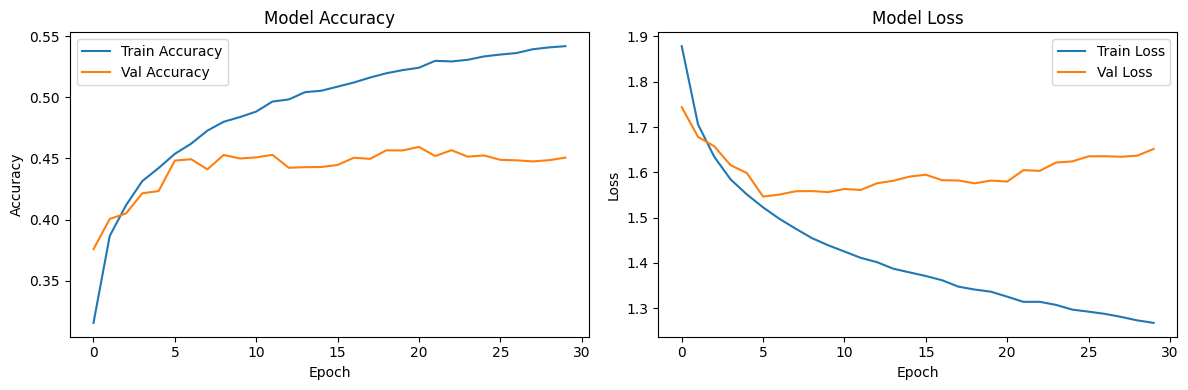

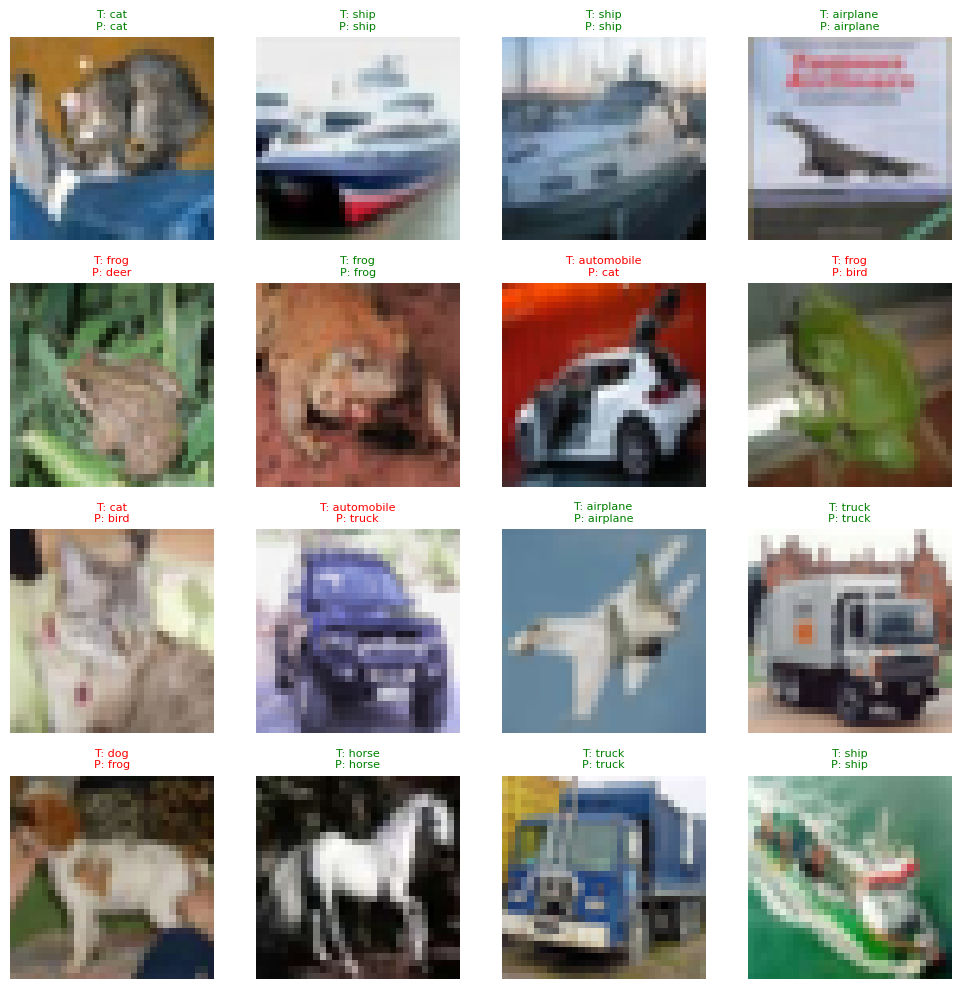


Overall Test Accuracy: 0.4479

Classification Report:
              precision    recall  f1-score   support

    airplane       0.47      0.64      0.54      1000
  automobile       0.58      0.49      0.53      1000
        bird       0.32      0.23      0.26      1000
         cat       0.29      0.26      0.27      1000
        deer       0.36      0.41      0.38      1000
         dog       0.40      0.33      0.36      1000
        frog       0.43      0.55      0.48      1000
       horse       0.47      0.54      0.50      1000
        ship       0.59      0.57      0.58      1000
       truck       0.54      0.48      0.51      1000

    accuracy                           0.45     10000
   macro avg       0.45      0.45      0.44     10000
weighted avg       0.45      0.45      0.44     10000



In [48]:
 # TODO

def main(epochs, val_split, batch_sz):
  """Main function to run the training pipeline.

    Args:
        epochs(int, optional): Number of epochs to train the model.
        val_split: Fraction of the training data to be used as validation data.
        batch_sz: Batch size for training.

    Returns:
        None

  """
  # (TODO)Preprocess the data
  x_train, x_test, y_train_oh, y_test_oh = data_preprocessing(X_train, X_test, y_train, y_test)

  # (TODO)Build Model
  model = build_model(input_shape=(32*32*3,), num_classes=10)

  # (TODO)Compile model
  compile_model(model)

 # Train model
  history = train_model(x_train, y_train_oh, model, epochs=epochs, val_split=val_split, batch_sz=batch_sz)

  test_loss, test_acc = model.evaluate(x_test, y_test_oh)
  print('Test accuracy:', test_acc)

  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  y_true = np.argmax(y_test_oh, axis=1)

  # Plots
  plot_metrics(history)
  plot_predictions(X_test, y_true, y_pred, num_samples=16)
  plot_label_comparison(y_true, y_pred)

  test_model_accuracy(history=history)

  return history

if __name__ == "__main__":
    
    # (TODO) Feel free to adjust the parameters
    history = main(epochs=30, val_split=0.2, batch_sz=32)

## Improvement Strategies

Consider the following strategies to help improve the accuracy of the above model.


1. **Increase the number of epochs**: The model might need more training iterations to learn the patterns in the data effectively.
2. **Add more FFN layers:** Stacking multiple FFN layers can help the model capture more complex dependencies.
3. **Adjust the learning rate:** Fine-tuning the learning rate can impact the model's convergence speed and performance.
4. **Try different Optimizers:** Explore various optimization algorithms (e.g., SGD, RMSprop).
Replace Adam in the `compile_model` function with another optimizer from `keras.optimizers`.
